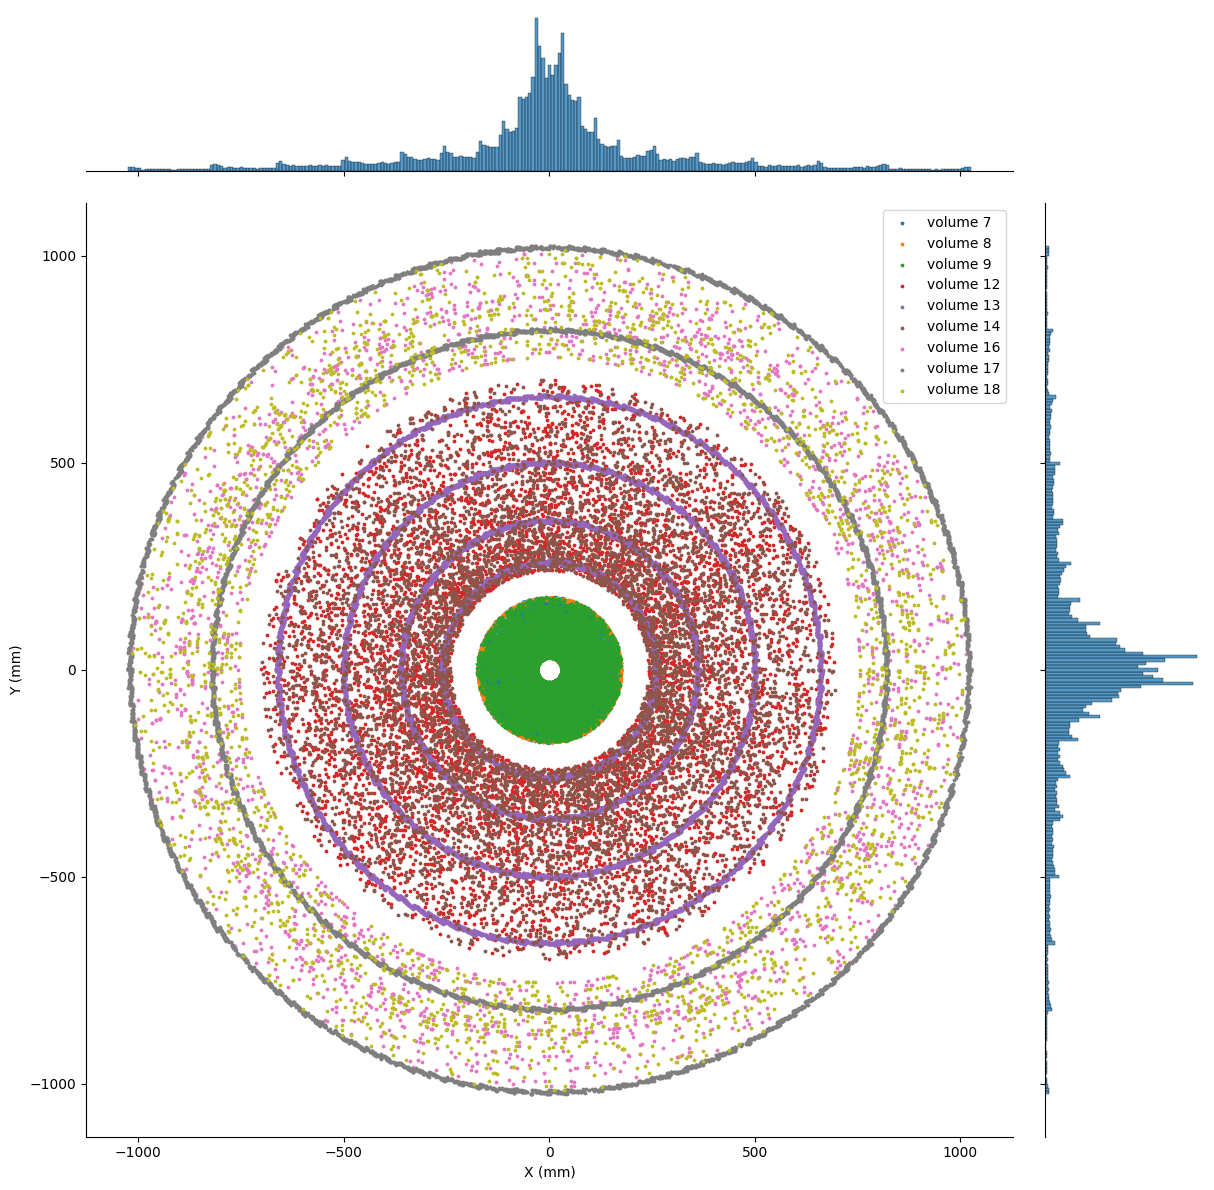

In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dataa_path = r"D:\MLData\train_1\train_1\event000001000-hits.csv"
dataa = pd.read_csv(dataa_path)
g = sns.jointplot(data=dataa, x='x', y='y', height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = dataa.volume_id.unique()
for volume in volumes:
    v = dataa[dataa.volume_id== volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

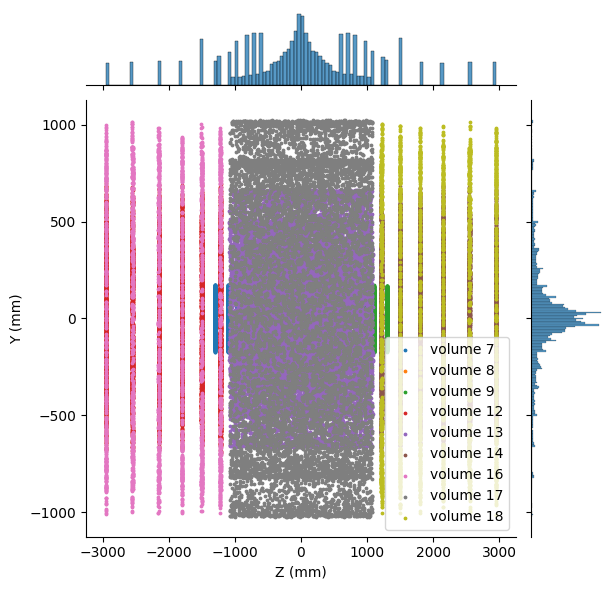

In [29]:
g = sns.jointplot(data= dataa, x='z', y='y', s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = dataa.volume_id.unique()
for volume in volumes:
    v = dataa[dataa.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

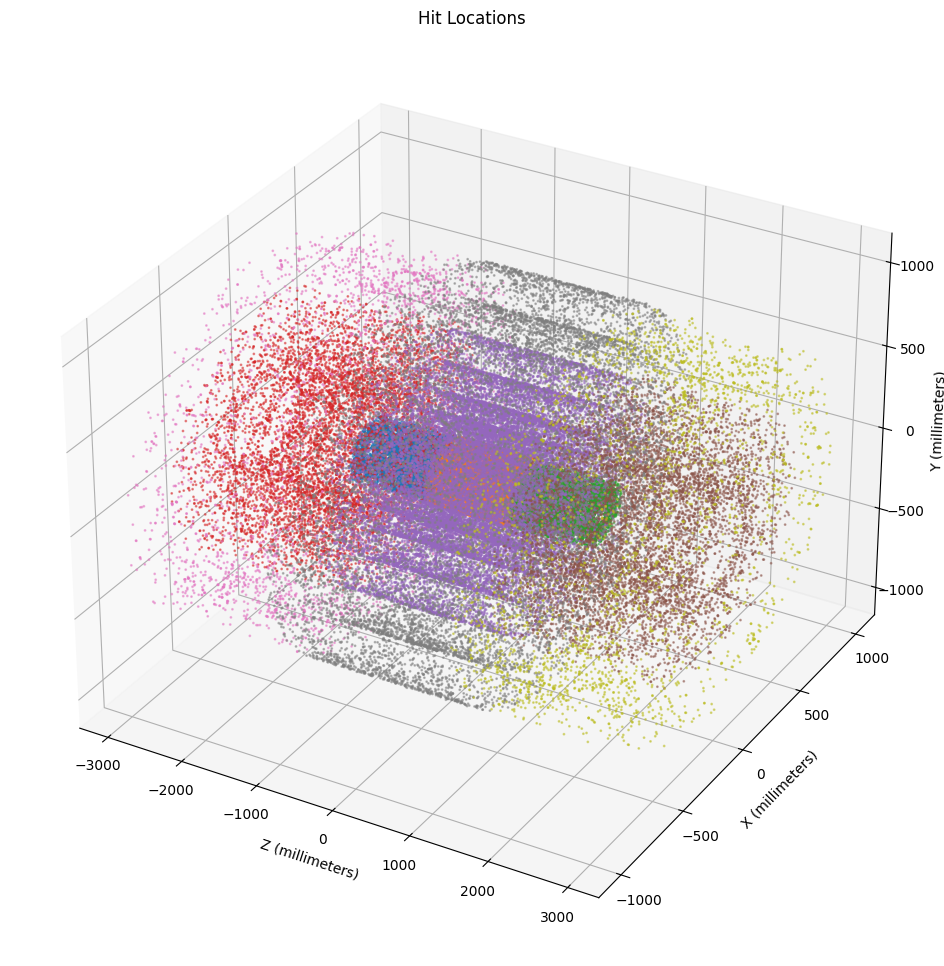

In [30]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = dataa[dataa.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()

In [35]:
data2_path = r"D:\MLData\train_1\train_1\event000001000-particles.csv"
data3_path = r"D:\MLData\train_1\train_1\event000001000-truth.csv"
particles = pd.read_csv(data2_path)
truth= pd.read_csv(data3_path)

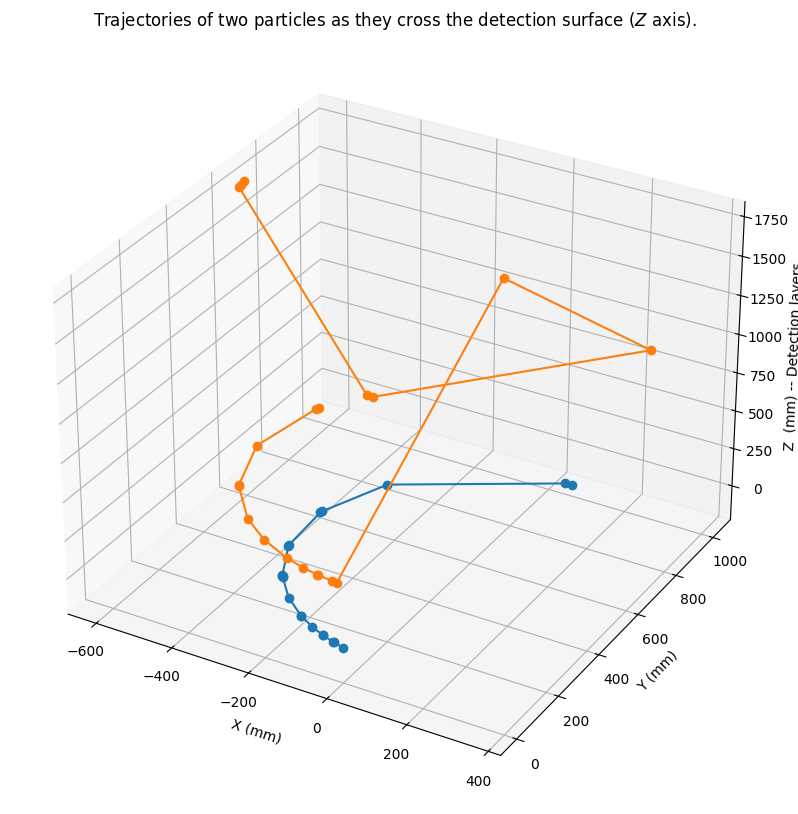

In [37]:
particle = particles.loc[particles.nhits == particles.nhits.max()].iloc[0]
particle2 = particles.loc[particles.nhits == particles.nhits.max()].iloc[1]

# Get points where the same particle intersected subsequent layers of the observation material
p_traj_surface = truth[truth.particle_id == particle.particle_id][['tx', 'ty', 'tz']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['tx', 'ty', 'tz']]

p_traj = pd.concat([p_traj_surface, pd.DataFrame({'tx': [particle.vx], 'ty': [particle.vy], 'tz': [particle.vz]})], ignore_index=True).sort_values(by='tz')
p_traj2 = pd.concat([p_traj_surface2, pd.DataFrame({'tx': [particle2.vx], 'ty': [particle2.vy], 'tz': [particle2.vz]})], ignore_index=True).sort_values(by='tz')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx,
    ys=p_traj.ty,
    zs=p_traj.tz, marker='o')
ax.plot(
    xs=p_traj2.tx,
    ys=p_traj2.ty,
    zs=p_traj2.tz, marker='o')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()

In [6]:
if data is not None:
    print("\nSample Data:")
    print(data.head())
    print("\nData Summary:")
    print(data.info())
    print("\nBasic Statistics:")
    print(data.describe())

    # Check for missing values
    missing_values = data.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])


Sample Data:
   hit_id        x         y       z  volume_id  layer_id  module_id
0       1 -64.4099 -7.163700 -1502.5          7         2          1
1       2 -55.3361  0.635342 -1502.5          7         2          1
2       3 -83.8305 -1.143010 -1502.5          7         2          1
3       4 -96.1091 -8.241030 -1502.5          7         2          1
4       5 -62.6736 -9.371200 -1502.5          7         2          1

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120939 entries, 0 to 120938
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   hit_id     120939 non-null  int64  
 1   x          120939 non-null  float64
 2   y          120939 non-null  float64
 3   z          120939 non-null  float64
 4   volume_id  120939 non-null  int64  
 5   layer_id   120939 non-null  int64  
 6   module_id  120939 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 6.5 MB
None

Basic Statistics:
    

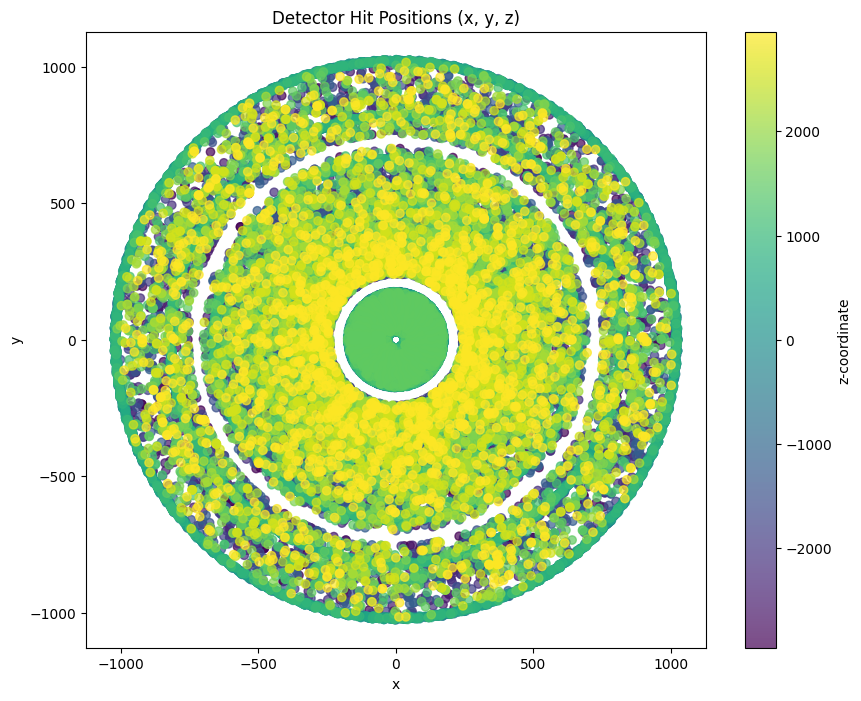

In [7]:
if data is not None:
    if 'energy' in data.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data['energy'], kde=True, bins=30, color='blue')
        plt.title("Energy Distribution of Detected Particles")
        plt.xlabel("Energy (GeV)")
        plt.ylabel("Frequency")
        plt.show()

    if {'x', 'y', 'z'}.issubset(data.columns):
        plt.figure(figsize=(10, 8))
        plt.scatter(data['x'], data['y'], c=data['z'], cmap='viridis', alpha=0.7)
        plt.colorbar(label='z-coordinate')
        plt.title("Detector Hit Positions (x, y, z)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()